#  
<u><h1>Task-03</h1><hr></u>
<h3>Problem statement -</h3>
<p>Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.</p>
<h3>Dataset used - </h3><p>Bank</p>
<h3>Source of the dataset -</h3>
<p>UCI Machine Learning Repository</p>
<h3>Description -</h3>
<p>This dataset contains information about customers from a bank including demographic and behavioral attributes. Key features include age, job type, marital status, education level, and financial indicators such as balance, housing loan, and personal loan status. The data also includes campaign-related information like contact method, day, month, duration of the last contact, number of contacts during the campaign, days since the last contact, previous campaign outcomes, and the overall campaign outcome, indicating whether the customer subscribed to the service. This dataset is used to analyze and predict customer behavior in response to marketing efforts.</p>
<h3>Aim -</h3>
<p>The aim of this project is to develop a decision tree classifier to accurately predict whether a customer will purchase a product or service based on their demographic and behavioral data. By using the Bank dataset from the UCI Machine Learning Repository, the goal is to create a model that not only achieves high overall accuracy but also improves the prediction of purchasing customers, thereby providing valuable insights for targeted marketing strategies and enhancing customer acquisition efforts.</p>

In [1]:
import pandas as pd

data=pd.read_csv(r"C:\Users\Hp\Downloads\bank12.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [2]:
print(data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [4]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop(columns=['y'])
y = data['y']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8614591009579956
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357

Confusion Matrix:
[[1110   95]
 [  93   59]]


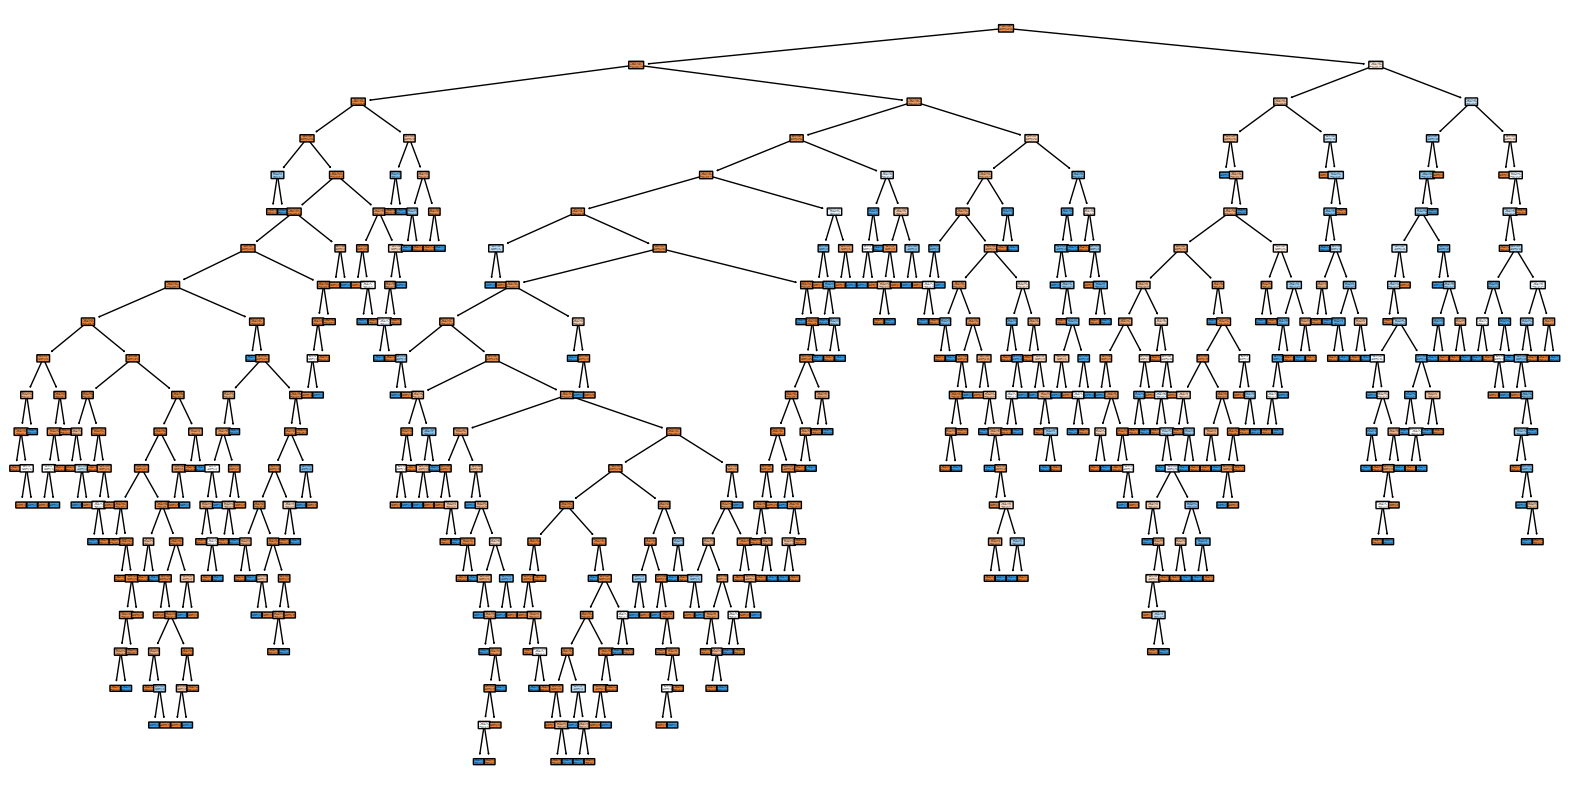

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['no', 'yes'], rounded=True)
plt.show()


# <h3>Inference</h3>

<p>After conducting the decision tree classifier analysis on the provided dataset, we obtained an accuracy score of approximately 86.15%. This indicates that the model correctly predicted the outcome for around 86.15% of the instances. Upon examining the classification report, we observed varying performance metrics for each class. The precision, recall, and F1-score for class '0' (indicating customers who did not purchase the product or service) were relatively high at 92%, 92%, and 92% respectively, suggesting good predictive capability for this class. However, for class '1' (representing customers who did make a purchase), the precision, recall, and F1-score were lower at 38%, 39%, and 39% respectively, indicating that the model struggled to accurately classify positive instances. The confusion matrix further illustrates this performance, showing a higher number of false negatives (95) compared to true positives (59) for class '1'.</p>

#
Now let us test the model by giving new data for prediction

In [15]:
new_data = pd.DataFrame({
    'age': [30, 45],
    'job': ['technician', 'entrepreneur'],
    'marital': ['married', 'single'],
    'education': ['secondary', 'tertiary'],
    'default': ['no', 'no'],
    'balance': [2000, 1500],
    'housing': ['yes', 'no'],
    'loan': ['no', 'yes'],
    'contact': ['cellular', 'telephone'],
    'day': [15, 20],
    'month': ['may', 'jul'],
    'duration': [180, 120],
    'campaign': [1, 3],
    'pdays': [999, 999],
    'previous': [0, 0],
    'poutcome': ['unknown', 'failure']
})

for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column])

new_predictions = clf.predict(new_data)
new_data['predictions'] = new_predictions
print(new_data)


   age  job  marital  education  default  balance  housing  loan  contact  \
0   30    9        1          1        0     2000        1     0        0   
1   45    2        2          2        0     1500        0     1        1   

   day  month  duration  campaign  pdays  previous  poutcome  predictions  
0   15      8       180         1    999         0         3            0  
1   20      5       120         3    999         0         0            0  


# 
This model predicts that both new customer profiles, one a 30-year-old married technician with a secondary education and the other a 45-year-old single entrepreneur with a tertiary education, will not purchase the product or service. These predictions indicate that the current profiles may not be ideal targets for immediate purchase conversion.